Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Data Reading
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")

In [106]:
# Checking sample data for train
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [39]:
#Checking data size

train.shape

(1017209, 9)

In [40]:
#Checking data types of columns and null analysis

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


All data points are non-null and therefore do not require any imputation or further analysis

In [41]:
#Checking the spread of numerical columns

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [109]:
# Checking sample data for store
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [107]:
#Checking data size
test.shape

(41088, 8)

In [108]:
#Checking data types of columns and null analysis
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Store data has null values, we will need to impute them

In [110]:
# Checking % counts of null values

100*test.isnull().sum()/store.shape[0]

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Open             0.026772
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
dtype: float64

Absence of promo values would mean that there are no promotions running on the store, we can impute that with zero

Competition Distance field has insignificant no. of null values, we will impute it with its mean

In [115]:
#test['CompetitionDistance'].fillna(test['CompetitionDistance'].mean(), inplace=True)

In [116]:
# Checking % counts of null values again
100*test.isnull().sum()/test.shape[0]

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Open             0.026772
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
dtype: float64

Competition Open Since Month and Competition Open Since Year has null values, we will handle them later after further analysis.

In [49]:
# Creating function for plots

def CountPlot(features,df):
    cols=4
    rows = len(features)//cols +1
    fig = plt.figure(figsize=(16, rows*5))
    dataframe = df.copy()
    for plot, feature in enumerate(features):
        fig.add_subplot(rows,cols,plot+1)
        fig.tight_layout(h_pad=5, w_pad=5)
        dataframe[feature] = dataframe[feature].fillna('Missing')
        ax = sns.countplot(x=feature, data=dataframe,order = dataframe[feature].value_counts().index)
        plt.xticks(rotation = 90)
        plt.title("for {}".format(feature))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(dataframe) * 100),
                    ha="center")

Univariate Data Analysis on datasets <br>
For Store Data

In [50]:
# Store Data categorical fields

store_categorical_fields=['StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

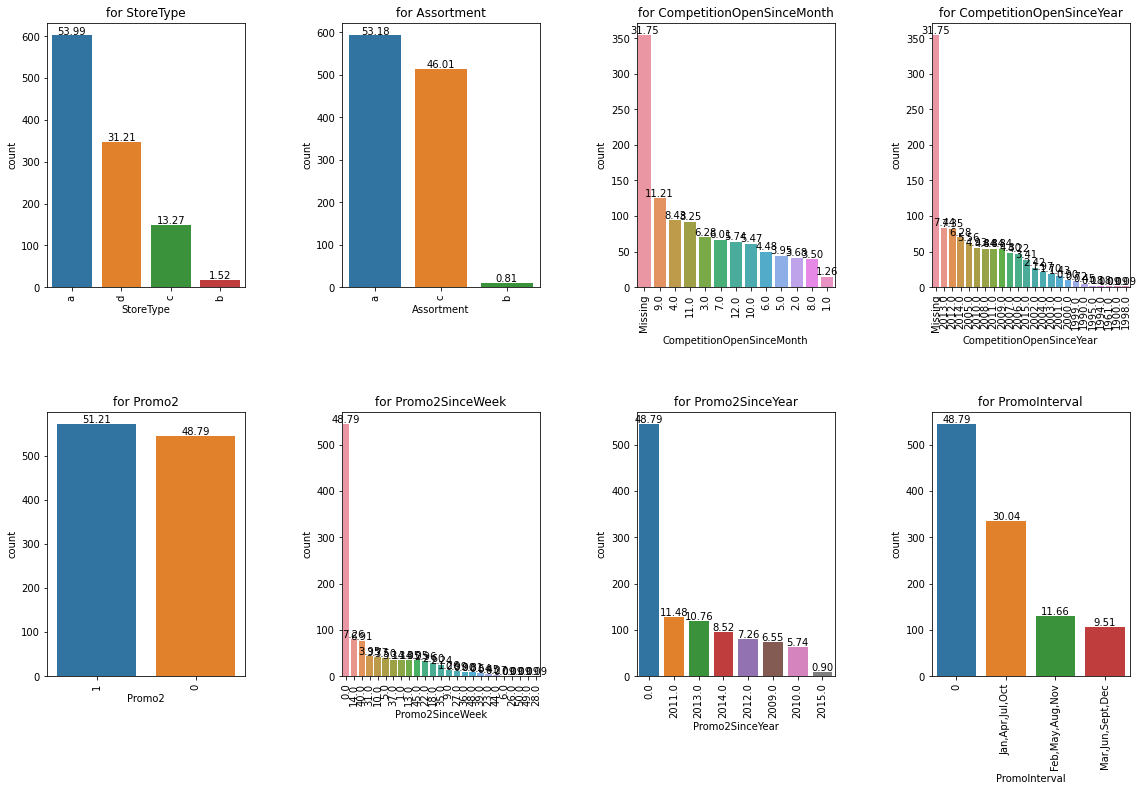

In [51]:
# Count plots for store data

CountPlot(store_categorical_fields,store)

Inferences on store data <br>
    -Majority of the stores, almost 54% are type A stores.<br>
    -Majority of the stores have type A of the assortments, other type of assortments are low.<br>
    -Data for Competition is Null for 31% of the stores, meaning there is either no competition for those stores or the data is missing.<br>
    -48% of the stores do not have promotions; Promo2 in the store.<br>
    -Promotions are concentrated in months of Jan, Apr, Jul, Oct months.

For Train Data

In [53]:
# Train Data categoric variables
train_categorical_fields=['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

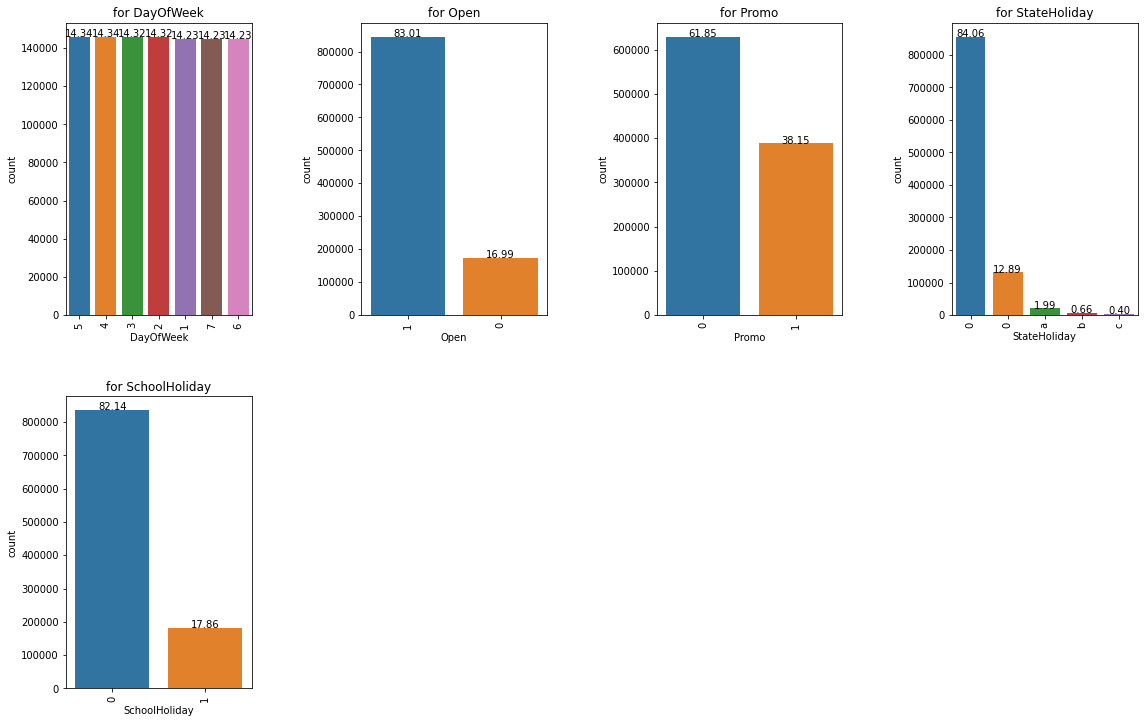

In [54]:
# Count plots for store data

CountPlot(train_categorical_fields,train)

Inferences on train data<br>
    -All days of the week have equal contribution.<br>
    -Stores are closed on only 17% data points.<br>
    -Promotions are active on only 38% records.<br>

# Box plot and outlier analysis on datasets
For store data

ValueError: Could not interpret input 'CompetitionDistance'

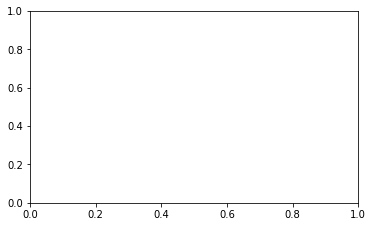

In [119]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.subplot(3,3,2)
sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.subplot(3,3,4)
sns.boxplot(x = 'Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x = 'Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

From the boxplots,we can see outliers in Competition Distance and Competition Open Since Year attributes. We will need to analyze them
For Competition distance, we would not need the values higher than the 99th percentile. We can cap the values having higher than 99th %ile to 99th %ile

In [56]:
# Capping values of CompetitionDistance to 99th %ile
store.loc[store.CompetitionDistance>store.CompetitionDistance.quantile(.99),'CompetitionDistance']=store.CompetitionDistance.quantile(.99)

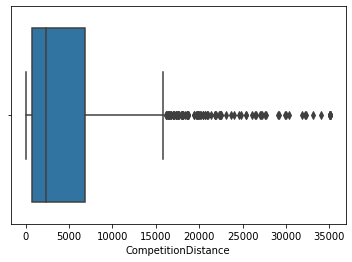

In [57]:
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.show()

The distance values seem to be in considerable range now.
Checking for CompetitionOpenSinceYear

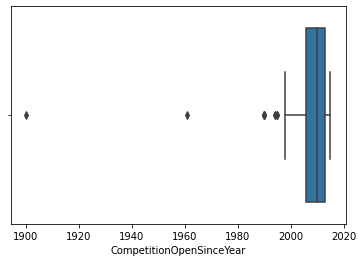

In [59]:
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.show()

In [60]:
store['CompetitionOpenSinceYear'].isnull().sum()

354

#### We can see CompetitionOpenSinceYear is null for 354 stores

In [61]:
#Checking the values of stores CompetitionDistance is null 

store.loc[store.CompetitionDistance.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store


#### We can impute them with zero

In [62]:
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceMonth']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceYear']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionDistance']=0

In [63]:
100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

Competition Open Since Month and Competition Open SinceYear are null for 31% of stores, lets check their cases

In [64]:
store.loc[store.CompetitionOpenSinceMonth.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
11,1070.0,NaN,NaN,12
12,310.0,NaN,NaN,13
15,3270.0,NaN,NaN,16
18,3240.0,NaN,NaN,19
21,1040.0,NaN,NaN,22
...,...,...,...,...
1095,1130.0,NaN,NaN,1096
1099,540.0,NaN,NaN,1100
1112,9260.0,NaN,NaN,1113
1113,870.0,NaN,NaN,1114


In [65]:
store.loc[store.CompetitionOpenSinceYear.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
11,1070.0,NaN,NaN,12
12,310.0,NaN,NaN,13
15,3270.0,NaN,NaN,16
18,3240.0,NaN,NaN,19
21,1040.0,NaN,NaN,22
...,...,...,...,...
1095,1130.0,NaN,NaN,1096
1099,540.0,NaN,NaN,1100
1112,9260.0,NaN,NaN,1113
1113,870.0,NaN,NaN,1114


#### No data is available for competition store openings, let's impute them with zero

In [66]:
store.CompetitionOpenSinceYear.fillna(0,inplace=True)
store.CompetitionOpenSinceMonth.fillna(0,inplace=True)

In [67]:
# Checking null values

100*store.isnull().sum()/store.shape[0]

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

# Merging the datasets

In [68]:
train = train.merge(right=store, on='Store', how='inner')

In [69]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [70]:
#Checking shape of the merged dataset

train.shape

(1017209, 18)

In [71]:
#Numerical descriptions

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.311265e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.051528e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.510780e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [72]:
# Checking percentage of null records

100*train.isnull().sum()/train.shape[0]

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

#### We do not have any null values in the data
# Bivariate Analysis on Data
### Box Plot Analysis

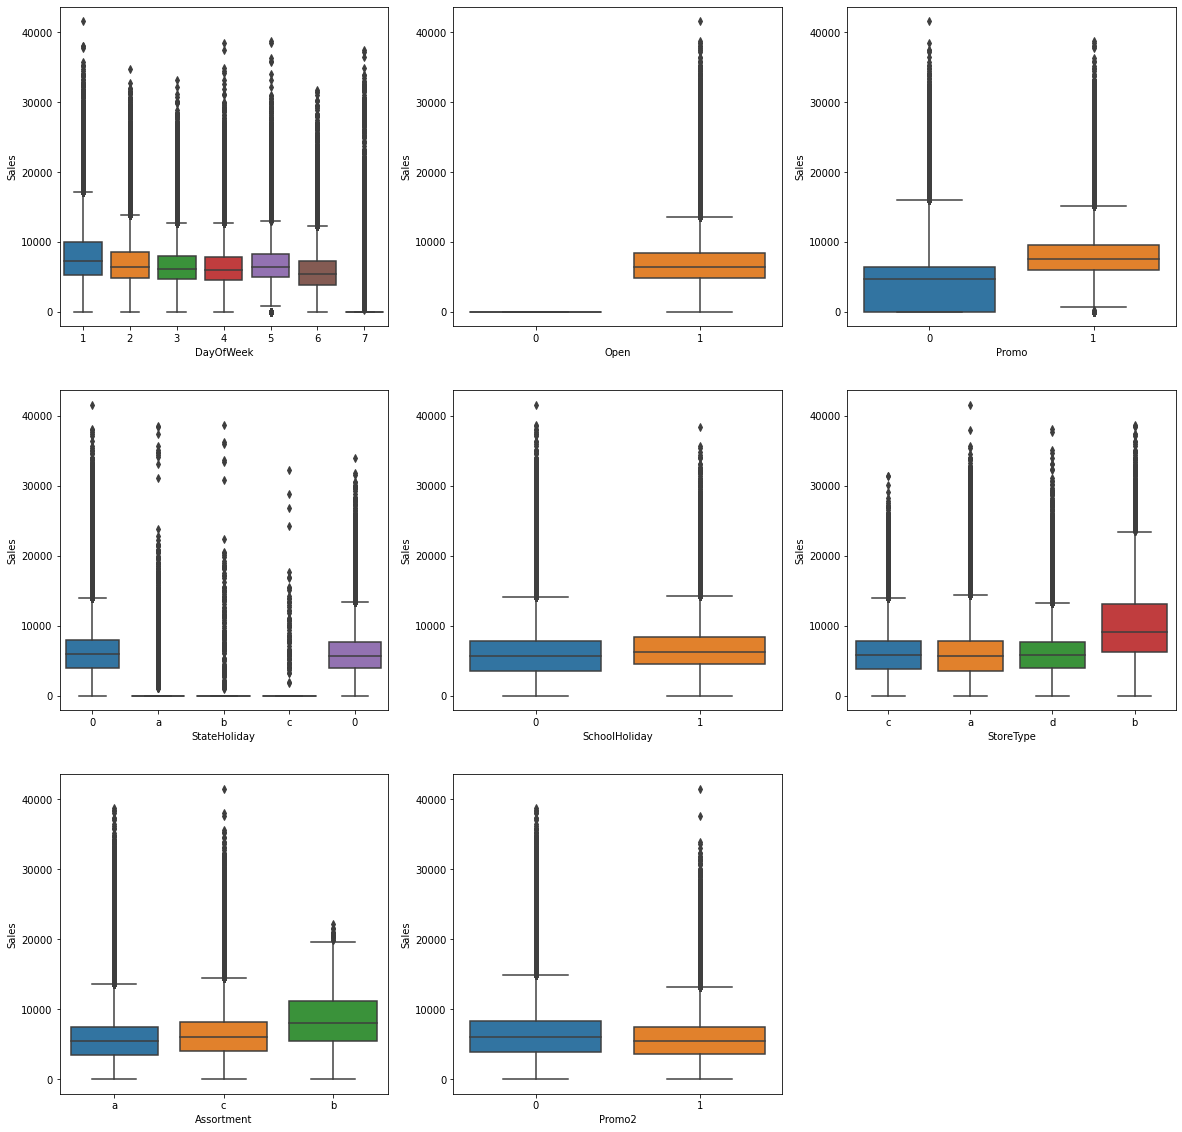

In [73]:
# Boxplots of attributes against Sales

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'Open', y = 'Sales', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'Promo', y = 'Sales', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = train)
plt.subplot(3,3,5)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = train)
plt.subplot(3,3,6)
sns.boxplot(x = 'StoreType', y = 'Sales', data = train)
plt.subplot(3,3,7)
sns.boxplot(x = 'Assortment', y = 'Sales', data = train)
plt.subplot(3,3,8)
sns.boxplot(x = 'Promo2', y = 'Sales', data = train)
plt.show()

Inferences on merged Data
Sales are higher on 1st, 2nd and 5th weekdays. Sales are very low on 7th weekday.
Sales are higher when promotion is 1
On state holidays, a, b and c, sales are low
School holidays do not seem to impact sales
Store type B has higher % of sales than other store types
Assortment type B has higher sales
Promo2 does not seem to have much contribution to sales
Scatter Plot Analysis

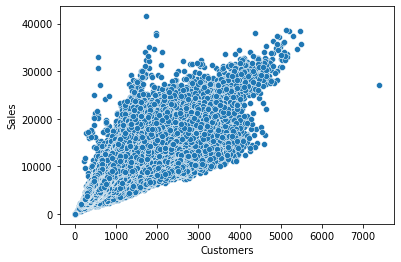

In [74]:
# Boxplots of Customers against Sales

sns.scatterplot(x = 'Customers', y = 'Sales', data = train)
plt.show()

Increase in no. of customers correlates an increase in sales

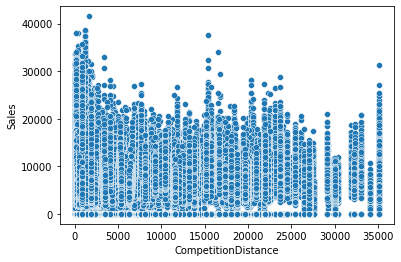

In [75]:
# Boxplots of Customers against Sales

sns.scatterplot(x = 'CompetitionDistance', y = 'Sales', data = train)
plt.show()

Competition does not seem to have any correlations against sales<br>
Multivariate Analysis<br>
For categorical variables<br>

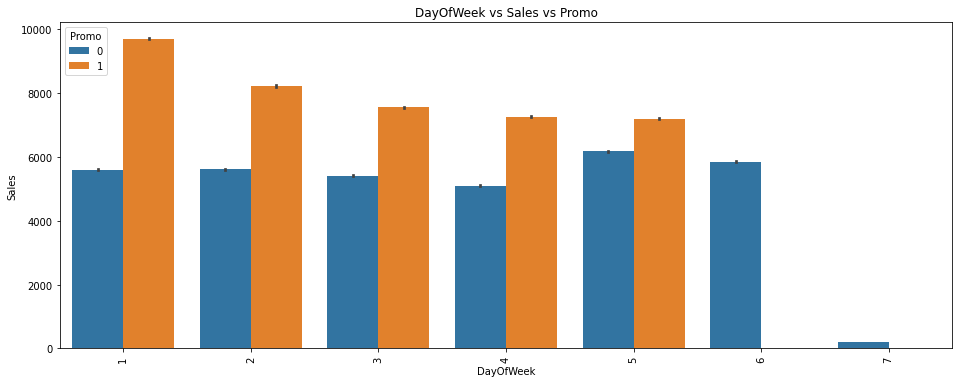

In [76]:
# Checking co-relation between Sales vs Days vs Promo

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=train)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

Promotion has a strong co-relation with sales of the stores.

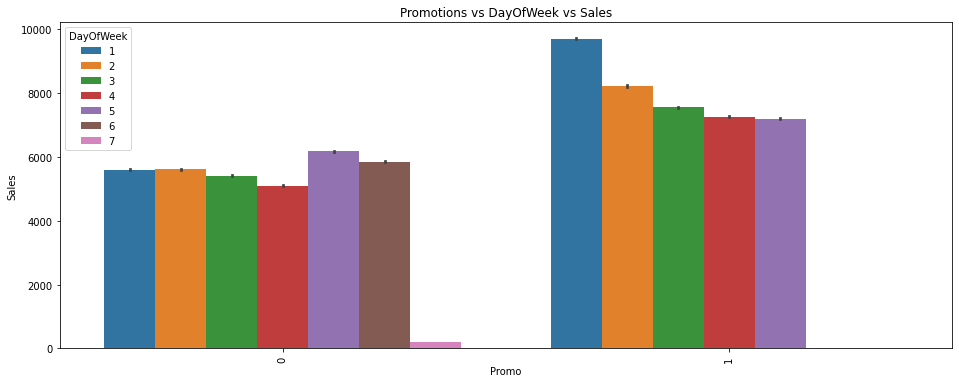

In [77]:
# Checking co-relation between Promo vs Days

plt.figure(figsize=(16, 6))
sns.barplot(x='Promo',y='Sales',hue='DayOfWeek',data=train)
plt.title("Promotions vs DayOfWeek vs Sales")
plt.xticks(rotation = 90)
plt.show()

Days at the start of the week are higher Sales than sales of other days

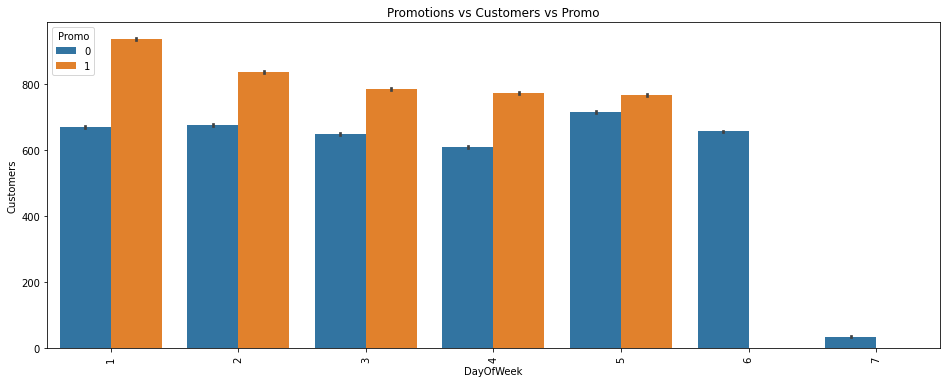

In [78]:
# Checking co-relation between Days vs Customers vs Promo 

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Customers',hue='Promo',data=train)
plt.title("Promotions vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

Customers are higher on weekdays and when promotios are active

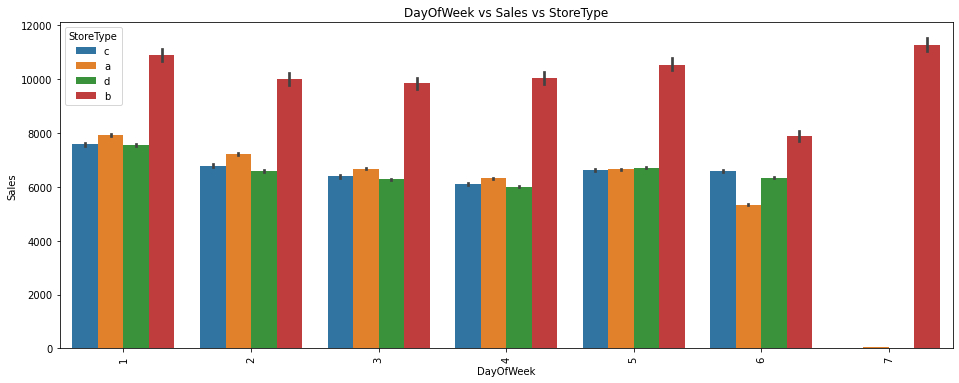

In [79]:
# Checking co-relation between Days vs Sales vs StoreType 

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=train)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

Sales for store type b is the highest among all days including day 7 where sales for other store type is almost zero. On day 6, the difference in sales among store type is marginally lower than other days

For numerical variables

<Figure size 2880x2880 with 0 Axes>

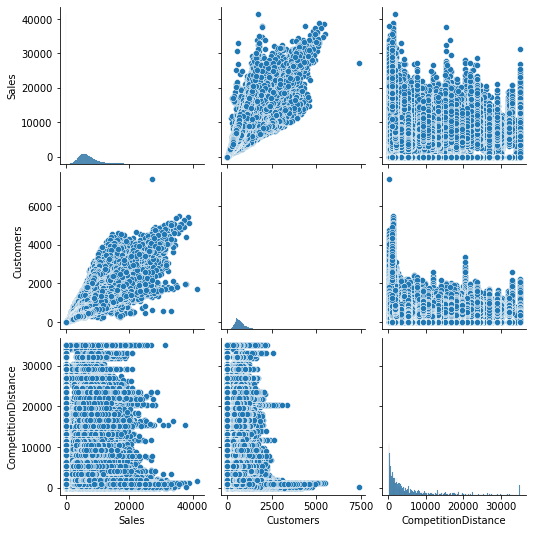

In [80]:
# Pairwise plot

plt.figure(figsize=(40, 40))
sns.pairplot(train[['Sales','Customers','CompetitionDistance']])
plt.show()

#### From the plot, we can see that as customers increase, sales also increases.

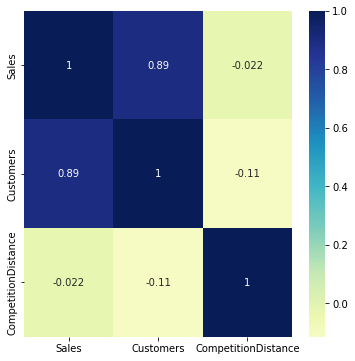

In [81]:
# Checking co-relation coefficients for numercial variables

# plot heat map for corr
cor = train[['Sales','Customers','CompetitionDistance']].corr()
plt.figure(figsize = (6, 6))
sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
plt.show()

Sales and customer have a very strong co-relation with a factor of 0.89. For other variables, it is insignificant.<br>
Feature Engineering<br>
Creating dummy variables<br>

In [82]:
# Creating dummy variable for day of the week 
dummies=pd.get_dummies(train['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
train=pd.concat([train,dummies],axis=1)

In [83]:
# Creating dummy variable for StoreType 

dummies=pd.get_dummies(train['StoreType'],drop_first=True,prefix='StoreType')
train=pd.concat([train,dummies],axis=1)

In [84]:
# Creating dummy variable for Assortment 

dummies=pd.get_dummies(train['Assortment'],drop_first=True,prefix='Assortment')
train=pd.concat([train,dummies],axis=1)

In [85]:
# Viewing data

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [86]:
# Dropping DayOfWeek, StoreType and Assortment

train.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


#### For competition data, we can merge their date information into a single column

In [87]:
train['CompetitionOpenSince'] = train.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + train.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [88]:
# Dropping CompetitionOpenSinceMonth, CompetitionOpenSinceYear fields

train.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)

#### We had 351 stores where competion opening dates were not available, the dates for CompetitionOpenSince for those stores needs to be impute with null

In [89]:
train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']

10362      0-0-01
10363      0-0-01
10364      0-0-01
10365      0-0-01
10366      0-0-01
            ...  
1017204    0-0-01
1017205    0-0-01
1017206    0-0-01
1017207    0-0-01
1017208    0-0-01
Name: CompetitionOpenSince, Length: 323348, dtype: object

In [90]:
#Imputing them with null

train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']=np.nan

In [91]:
#Checking datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  int64  
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  DayOfWeek_2           1017209 non-null  uint8  
 14  DayOfWeek_3           1017209 non-

Date and CompetitionOpenSince are date objects, we need convert them into datetime objects

In [92]:
#Converting date field to datetime object

train['Date']=pd.to_datetime(train['Date'],errors='coerce')

In [93]:
#Converting CompetitionOpenSince field to datetime object

train['CompetitionOpenSince']=pd.to_datetime(train['CompetitionOpenSince'],errors='coerce')

In [94]:
#Checking data types again

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

#### There will be store transaction dates where sales were made before competition started and sales after competition. Let's create a new flag for their identification

In [95]:
def calculate_compitition(row):
    if row.CompetitionOpenSince>row.Date:
        return 1
    else:
        return 0
train['Before_Competition']=train[['CompetitionOpenSince','Date']].apply(calculate_compitition,axis=1)

In [97]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince,Before_Competition
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,1,0,0,0,1,0,0,0,2008-09-01,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob